<a href="https://colab.research.google.com/github/vineetyadav/H-M_Persnalized_Fashion_Recommendation/blob/main/H%26M_Persnalized_Fashion_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

H&M Personalized Fashion Recommendation 

In [1]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
  Using cached kaggle-1.5.6-py3-none-any.whl


In [5]:
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations

h-and-m-personalized-fashion-recommendations.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!mkdir hnm
!cp h-and-m-personalized-fashion-recommendations.zip hnm
!cd hnm
!unzip h-and-m-personalized-fashion-recommendations.zip

mkdir: cannot create directory ‘hnm’: File exists
Archive:  h-and-m-personalized-fashion-recommendations.zip
replace articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
sns.pie(x=)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os 


## install recommendation library 

In [3]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Number of Missing Values', 'Percentage'])


In [4]:
import scipy.stats as ss
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [5]:
import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [6]:
!pip install surprise 

In [7]:
train_dataset = pd.read_csv("transactions_train.csv")
train_dataset.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
customer_dataset = pd.read_csv("customers.csv")
customer_dataset.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
def compute_cramers_v(df,var1,var2):
  
  rows= []
  col =[]
  print("var1",df[var1])
  cramers =cramers_v(df[var1], df[var2]) # Cramer's V test
  col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
  cramers_results = np.array(rows)
  df_new = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns)
  return df_new

In [10]:
customer_dataset1 = customer_dataset
customer_dataset1.fillna(0)
customer_dataset_corr = cramers_v(customer_dataset1["FN"],customer_dataset1["Active"])
customer_dataset_corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


nan

In [11]:
customer_dataset.memory_usage(deep=True)

Index                           128
customer_id               166009580
FN                         10975840
Active                     10975840
club_member_status         86620059
fashion_news_frequency     85616125
age                        10975840
postal_code               166009580
dtype: int64

In [12]:
article_dataset = pd.read_csv("articles.csv")
article_dataset.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [13]:
top_sold_products = train_dataset["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, article_dataset, on="article_id")[["article_id", "count", "prod_name"]]
top_sold_products

,article_id,count,prod_name
0,706016001,50287,Jade HW Skinny Denim TRS
1,706016002,35043,Jade HW Skinny Denim TRS
2,372860001,31718,7p Basic Shaftless
3,610776002,30199,Tilly (1)
4,759871002,26329,Tilda tank
5,464297007,25025,Greta Thong Mynta Low 3p
6,372860002,24458,7p Basic Shaftless
7,610776001,22451,Tilly (1)
8,399223001,22236,Curvy Jeggings HW Ankle
9,706016003,21241,Jade HW Skinny Denim TRS


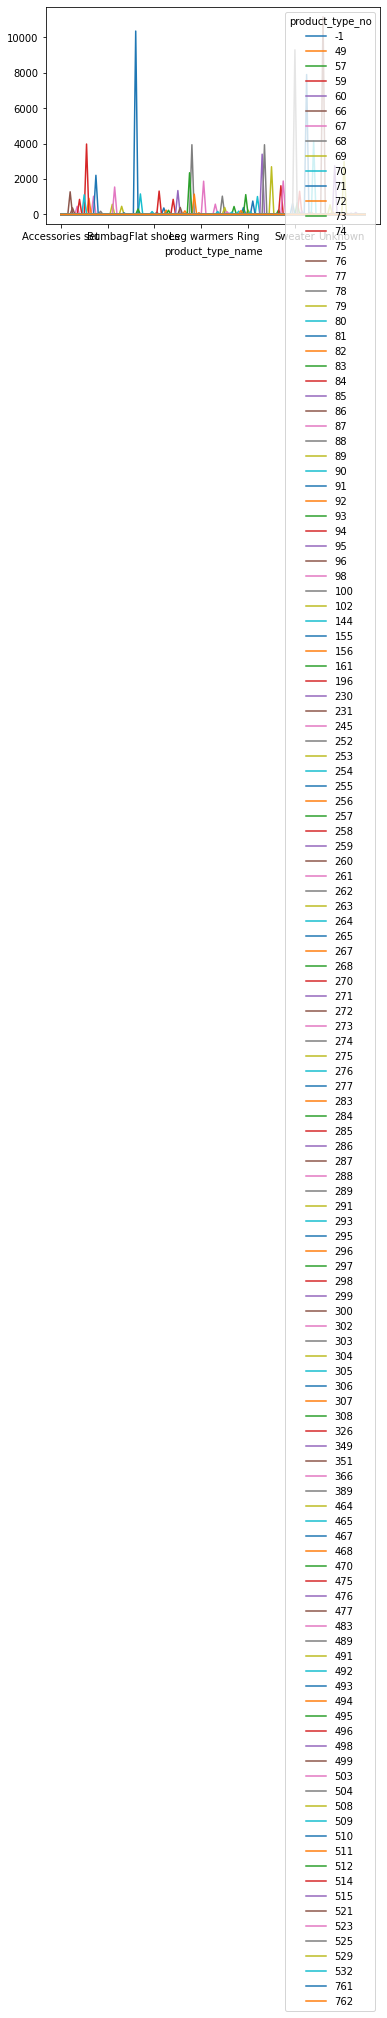

In [14]:
confusion_matrix = pd.crosstab(article_dataset["product_type_name"], article_dataset["product_type_no"])
confusion_matrix.plot()

In [15]:
article_dataset1 = article_dataset
list_of_columns = [("product_type_name","product_type_no"),("index_code","index_name"),("colour_group_code","colour_group_name"),("product_type_name","product_group_name"),("department_no","department_name"),("graphical_appearance_no","graphical_appearance_name"),("section_no","section_name"),("garment_group_no","garment_group_name")]
article_dataset1.fillna(0)
for cv in list_of_columns:
  corr = cramers_v(article_dataset1[cv[0]],article_dataset1[cv[1]])
  print("Column %s and Column %s has %f correlation"%(cv[0],cv[1],corr))

Column product_type_name and Column product_type_no has 0.999995 correlation
Column index_code and Column index_name has 1.000000 correlation
Column colour_group_code and Column colour_group_name has 1.000000 correlation
Column product_type_name and Column product_group_name has 0.995055 correlation
Column department_no and Column department_name has 0.999767 correlation
Column graphical_appearance_no and Column graphical_appearance_name has 1.000000 correlation
Column section_no and Column section_name has 0.999995 correlation
Column garment_group_no and Column garment_group_name has 1.000000 correlation


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
print(article_dataset1.head())

print(article_dataset1.head())
fit = test.fit(article_dataset1, article_dataset["article_id"])



   article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid               

ValueError: ignored

In [17]:
article_dataset.memory_usage(deep=True)

Index                                128
article_id                        844336
product_code                      844336
prod_name                        7659437
product_type_no                   844336
product_type_name                6907494
product_group_name               7645530
graphical_appearance_no           844336
graphical_appearance_name        6890400
colour_group_code                 844336
colour_group_name                6805402
perceived_colour_value_id         844336
perceived_colour_value_name      6734878
perceived_colour_master_id        844336
perceived_colour_master_name     6535647
department_no                     844336
department_name                  7402739
index_code                       6121436
index_name                       7468334
index_group_no                    844336
index_group_name                 7087934
section_no                        844336
section_name                     7782991
garment_group_no                  844336
garment_group_na

In [18]:
train_dataset.describe(include="all")

,t_dat,customer_id,article_id,price,sales_channel_id
count,31788324,31788324,3.178832e+07,3.178832e+07,3.178832e+07
unique,734,1362281,NaN,NaN,NaN
top,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,NaN,NaN,NaN
freq,198622,1895,NaN,NaN,NaN
mean,NaN,NaN,6.962272e+08,2.782927e-02,1.704028e+00
std,NaN,NaN,1.334480e+08,1.918113e-02,4.564786e-01
min,NaN,NaN,1.087750e+08,1.694915e-05,1.000000e+00
25%,NaN,NaN,6.328030e+08,1.581356e-02,1.000000e+00
50%,NaN,NaN,7.145820e+08,2.540678e-02,2.000000e+00
75%,NaN,NaN,7.865240e+08,3.388136e-02,2.000000e+00


In [19]:
article_dataset.describe(include="all")

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
count,1.055420e+05,105542.000000,105542,105542.000000,105542,105542,1.055420e+05,105542,105542.000000,105542,...,105542,105542,105542,105542.000000,105542,105542.000000,105542,105542.000000,105542,105126
unique,NaN,NaN,45875,NaN,131,19,NaN,30,NaN,50,...,250,10,10,NaN,5,NaN,56,NaN,21,43404
top,NaN,NaN,Dragonfly dress,NaN,Trousers,Garment Upper body,NaN,Solid,NaN,Black,...,Jersey,A,Ladieswear,NaN,Ladieswear,NaN,Womens Everyday Collection,NaN,Jersey Fancy,T-shirt in printed cotton jersey.
freq,NaN,NaN,98,NaN,11169,42741,NaN,49747,NaN,22670,...,4604,26001,26001,NaN,39737,NaN,7295,NaN,21445,159
mean,6.984246e+08,698424.563378,NaN,234.861875,NaN,NaN,1.009515e+06,NaN,32.233822,NaN,...,NaN,NaN,NaN,3.171534,NaN,42.664219,NaN,1010.438290,NaN,NaN
std,1.284624e+08,128462.384432,NaN,75.049308,NaN,NaN,2.241359e+04,NaN,28.086154,NaN,...,NaN,NaN,NaN,4.353234,NaN,23.260105,NaN,6.731023,NaN,NaN
min,1.087750e+08,108775.000000,NaN,-1.000000,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,2.000000,NaN,1001.000000,NaN,NaN
25%,6.169925e+08,616992.500000,NaN,252.000000,NaN,NaN,1.010008e+06,NaN,9.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,20.000000,NaN,1005.000000,NaN,NaN
50%,7.022130e+08,702213.000000,NaN,259.000000,NaN,NaN,1.010016e+06,NaN,14.000000,NaN,...,NaN,NaN,NaN,2.000000,NaN,46.000000,NaN,1009.000000,NaN,NaN
75%,7.967030e+08,796703.000000,NaN,272.000000,NaN,NaN,1.010016e+06,NaN,52.000000,NaN,...,NaN,NaN,NaN,4.000000,NaN,61.000000,NaN,1017.000000,NaN,NaN


In [20]:
articles_missing=missing_values(article_dataset)
articles_missing.loc[articles_missing['Percentage']>0]

,Number of Missing Values,Percentage
detail_desc,416,0.394156


In [25]:
customer_missing=missing_values(customer_dataset)
customer_missing.loc[customer_missing['Percentage']>0]

,Number of Missing Values,Percentage
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843


In [21]:
transactions_missing=missing_values(train_dataset)
transactions_missing.loc[transactions_missing['Percentage']>0]

,Number of Missing Values,Percentage


In [22]:
customer_dataset.describe(include="all")

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
count,1371980,476930.0,464404.0,1365918,1355971,1.356119e+06,1371980
unique,1371980,NaN,NaN,3,4,NaN,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,NaN,NaN,1272491,877711,NaN,120303
mean,NaN,1.0,1.0,NaN,NaN,3.638696e+01,NaN
std,NaN,0.0,0.0,NaN,NaN,1.431363e+01,NaN
min,NaN,1.0,1.0,NaN,NaN,1.600000e+01,NaN
25%,NaN,1.0,1.0,NaN,NaN,2.400000e+01,NaN
50%,NaN,1.0,1.0,NaN,NaN,3.200000e+01,NaN
75%,NaN,1.0,1.0,NaN,NaN,4.900000e+01,NaN


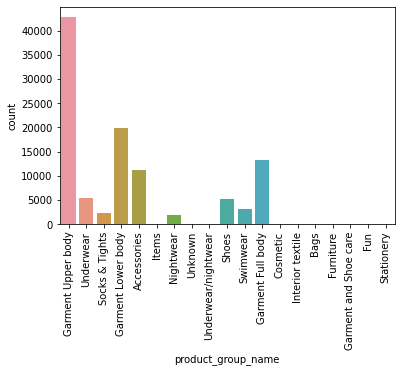

In [23]:
import seaborn as sns 
import matplotlib as plt 
g = sns.countplot(data=article_dataset,x="product_group_name")
g.tick_params(axis='x', rotation=90)


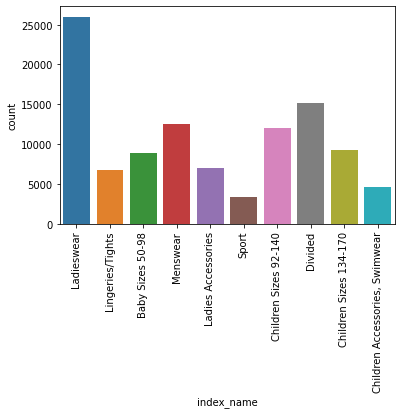

In [24]:
g = sns.countplot(data=article_dataset,x="index_name")
g.tick_params(axis='x', rotation=90)

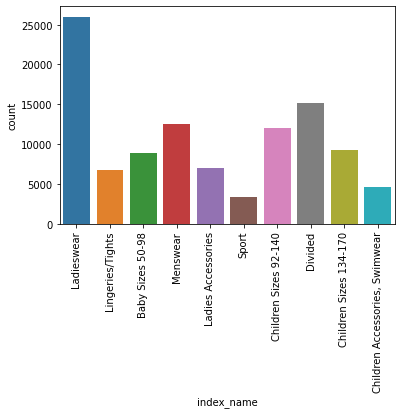

In [25]:
g = sns.countplot(data=article_dataset,x="index_name")
g.tick_params(axis='x', rotation=90)

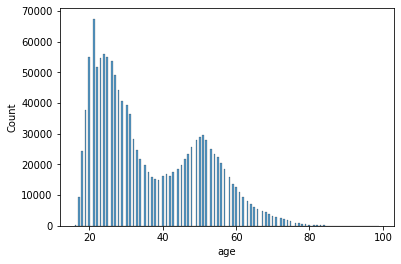

In [26]:
g = sns.histplot(data=customer_dataset,x="age")


In [32]:
from surprise import NMF
from surprise import svd

ModuleNotFoundError: ignored

In [27]:
customer_dataset["Active"].fillna(0,inplace=True)
customer_dataset.head()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


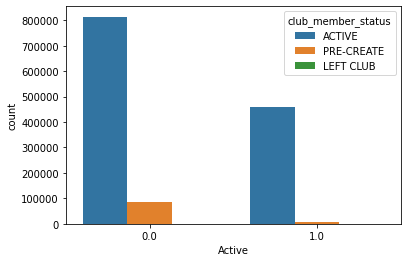

In [28]:
sns.countplot(x="Active",data=customer_dataset,hue="club_member_status")

In [29]:
sample_submission = pd.read_csv("sample_submission.csv")
print(sample_submission.head())
sample_submission.columns

                                         customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...  


Index(['customer_id', 'prediction'], dtype='object')

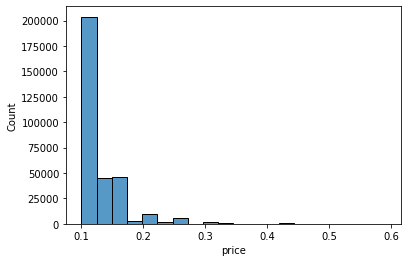

In [30]:
price_data = train_dataset[train_dataset["price"]>0.1]
sns.histplot(x="price",data=price_data,bins=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


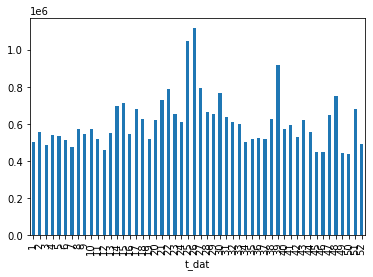

In [31]:
import pandas as pd
train_dataset["t_dat"] = train_dataset["t_dat"].astype("datetime64")
train_dataset.groupby(train_dataset["t_dat"].dt.week).count()["t_dat"].plot(kind="bar")



In [32]:
counter_dataset = pd.DataFrame(train_dataset["article_id"])
threshold_check = train_dataset.groupby("article_id").size().max()
counter_dataset["Count"] = counter_dataset["article_id"].map(train_dataset.groupby("article_id").size())



In [37]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [38]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader

In [33]:
print(len(train_dataset["article_id"].unique()))
print(len(article_dataset["article_id"].unique()))

104547
105542


In [40]:
train_dataset.set_index(["customer_id","article_id"])
customer_dataset.set_index("customer_id")
article_dataset.set_index("article_id")
train_article_dataset = pd.merge(train_dataset,article_dataset,on="article_id")
#train_customer_dataset = pd.merge(train_dataset,customer_dataset,on="customer_id")
#train_customer_dataset.set_index(["customer_id","article_id"])
#article_dataset.set_index(["article_id"])
#train_complete_dataset = pd.merge(train_customer_dataset,article_dataset,on="article_id")

In [ ]:
train_complete_dataset.head()

NameError: ignored

In [ ]:
from surprise import AlgoBase 
from surprise.model_selection import cross_validate
from surprise import PredictionImpossible 

In [ ]:
class MyOwnAglorithm(AlgoBase):
  def __init__(self,sim_options={},bsl_options={}):
    AlgoBase.__init__(self,sim_options=sim_options,bsl_options=bsl_options)

  def fit(self,trainset):
    AlgoBase.fit(self,trainset)

    #Compute baselines and similarities
    self.bu,self.bi = self.compute_baselines()
    self.sim = self.compute_similarities()

    return self
  
  def estimate(self,u , i):
    if not(self.trainset.knows_user(u) and self.trainset.knows_item(i)):
      raise PredictionImpossible("User and/or item unknown. ")

      #Compute similarities between u and v where v describes
      #users that have also rated i 
      neighbours = [(v,self.sim[u,v]) for (v,r) in self.trainset.ir[i]]
      #sort these neighbours by similarity 
      neighbours = sorted(neighbours, key=lambda x:x[1],reverse=True)

      print(" The 3 nearest neighbours of user",str(u),"are")
      for v,sim_uv in neighbours[:3]:
        print('user{0:} with sim {1:1.2f})'.format(v,sim_uv)
      
      #...Aaaand return the baseline estimate anyway
      bsl = self.trainset.global_mean+self.bu[u]+self.bi[u]
      return bsl
data = Dataset.load_builtin('m1-100k')
algo = MyownAlgorithm 

cross_validate(algo,data,verbose=True)



SyntaxError: ignored

In [ ]:
!pip install turicreate --user

import turicreate as tc
import cudf
import cuml
import cupy

from cuml.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.9/449.9 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.8 MB/s eta 0:00:

ModuleNotFoundError: ignored

Market basket Analysis 

In [34]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
train_dataset.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [36]:
#train_dataset.groupby(["customer_id","t_dat"]).size()
new_train_dataset = train_dataset[(train_dataset['t_dat'] > '2018-09-20') & (train_dataset['t_dat'] < '2018-09-22')]
#new_train_dataset.drop(["price","sales_channel_id"],axis=1,inplace=True)
new_train_dataset
#new_train_dataset.groupby(["customer_id","t_dat"]).size()

,t_dat,customer_id,article_id,price,sales_channel_id
48399,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,583558001,0.067780,2
48400,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,639677008,0.025407,2
48401,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,640244003,0.033881,2
48402,2018-09-21,0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f...,685687004,0.016932,2
48403,2018-09-21,0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f...,591334004,0.010153,2
...,...,...,...,...,...
95937,2018-09-21,fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b...,673638005,0.016932,1
95938,2018-09-21,fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b...,630145002,0.050831,1
95939,2018-09-21,fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b...,634321002,0.042356,1
95940,2018-09-21,fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b...,633870001,0.042356,1


In [68]:
pd.pivot_table(new_train_dataset, index=['customer_id','t_dat'], columns='article_id',values="price",fill_value=0)

,article_id,108775015,108775044,108775051,110065001,110065002,110065011,111565001,111586001,111593001,111609001,...,722059002,723543001,723595001,723595002,725253001,727754001,728146001,728162001,728162002,729931001
customer_id,t_dat,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f110a8a4092aa7e173e,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ca60ca6d8de6d3b4689e2da829d69db5947bd89084cd3a0849f4ea57375fd,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001521e8394eb81ba43ab5b84ae7e756d51ac813be212a96e8779e0e42c029c0,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe16bdcc719492e16087ff1dedef7f6a03540451ce6d4447b46e4ad1aa121cb,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffe30cb089362a6afbb315dcaecde12094a3b5dda7e6d8ba7fb4c1ab7a99b823,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,2018-09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
train_dataset_new = pd.merge(new_train_dataset, article_dataset, on="article_id")[["article_id", "prod_name","customer_id","t_dat"]]
train_dataset_new = train_dataset_new.groupby(["customer_id","t_dat"])['prod_name'].apply(list).tolist()

In [41]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
te = TransactionEncoder()
print(train_dataset_new)
te_ary = te.fit(train_dataset_new).transform(train_dataset_new)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.0004, use_colnames=True)
frequent_itemsets

[['Noel denim dress', 'Portofino ISW 28', 'CORY CORD SKIRT'], ['W YODA KNIT OL OFFER', 'Flock'], ['SUPREME TIGHTS'], ['Dover Funnel', 'Gyda!', 'Flirty Disa ring pk', 'GREG 2-p tanktop BB', 'GREG 2-p tanktop BB', 'BELT BASIC', 'Billy softie', 'EDC CAROL TRS', 'EDC ROMAN BLOUSE', 'class monica nl', 'Ledger set', 'Kanta slacks', 'Dalia hip belt'], ['Dee dee lace', 'Dee dee lace', 'Microtights 2pk SG', 'Basic 2pk tights SG', 'Basic 2pk tights SG', 'Barbro Cord Dungaree', 'Barbro Cord Dungaree', 'Totte Set', '2-p micro tights SG', '2-p basic cotton tights SG', '2-p basic cotton tights SG', 'Nova 2pack', 'Nova 2pack', '2-p basic cotton tights SG', '2-p basic cotton tights SG', 'Klara Dress', 'Klara Dress', 'FREJA 3-PACK', 'FREJA 3-PACK', 'Naomi', 'SHANE HOOD', 'SHANE HOOD', 'Detroit skirt', 'Detroit skirt', 'Sun Cord Skirt', 'Sun Cord Skirt', 'MAGIC CREWNECK', 'MAGIC CREWNECK', 'Hilda Skirt', 'MAX DEAL HOOD', 'MAX DEAL HOOD', 'FREJA 3-PACK', 'CLEO Shirtdress', 'CLEO Shirtdress'], ['W YODA KN

,support,itemsets
0,0.000790,(&DENIM Jeggings HW)
1,0.000431,(&DENIM+ Skinny shaping RW)
2,0.000790,(1 - PACK)
3,0.000502,(1 Pk expressive)
4,0.001723,(1 pk Fun)
...,...,...
1772,0.000431,"(Vanilla Ice Top, Vanilla Ice Brief)"
1773,0.000502,"(Vincent (1), Vincent)"
1774,0.000790,"(Violet Thong Malva Low, Violet Push Valencia)"
1775,0.000790,"(W YODA KNIT OL OFFER, Zebra sweater TOP PRODUCT)"


In [43]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dawn magnolia thong),(Dawn padded Tshirt),0.002369,0.003374,0.001364,0.575758,170.669246,0.001356,2.349191
1,(Don Vito moulded triangle),(Don Vito tie tanga),0.001005,0.000718,0.000646,0.642857,895.628571,0.000645,2.797990
2,(Don Vito tie tanga),(Don Vito moulded triangle),0.000718,0.001005,0.000646,0.900000,895.628571,0.000645,9.989951
3,(Gandi),(Tulip),0.001579,0.002225,0.000861,0.545455,245.137830,0.000858,2.195105
4,(Hazelnut Brazilian Acacia Low),(Hazelnut Push Melbourne),0.003158,0.005958,0.002082,0.659091,110.631982,0.002063,2.915858
5,(LS Regipetto padded softbra),(LS Hazel padded softbra.),0.001220,0.002369,0.000718,0.588235,248.342246,0.000715,2.422819
6,(Lazer Razer Push Up),(Lazer Razer Brief),0.000718,0.001220,0.000574,0.800000,655.623529,0.000573,4.993899
7,(Papi Chulo Top),(Papi Chulo Tie Tanga),0.000790,0.000933,0.000646,0.818182,876.839161,0.000645,5.494868
8,(Papi Chulo Tie Tanga),(Papi Chulo Top),0.000933,0.000790,0.000646,0.692308,876.839161,0.000645,3.247434
9,(Vanilla Ice Top),(Vanilla Ice Brief),0.000574,0.000574,0.000431,0.750000,1306.125000,0.000430,3.997703


In [64]:
new_train_dataset.groupby(['customer_id', 't_dat']).size().unstack(fill_value=0).astype(bool).rename_axis().reset_index()


t_dat,customer_id,2018-09-21 00:00:00
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,True
1,0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f...,True
2,000ca60ca6d8de6d3b4689e2da829d69db5947bd89084c...,True
3,000fb6e772c5d0023892065e659963da90b1866035558e...,True
4,001521e8394eb81ba43ab5b84ae7e756d51ac813be212a...,True
...,...,...
13927,ffe16bdcc719492e16087ff1dedef7f6a03540451ce6d4...,True
13928,ffe30cb089362a6afbb315dcaecde12094a3b5dda7e6d8...,True
13929,fff0ac18093a702a0a06f4cc76582632df3ede9a36556e...,True
13930,fff4b145d7469e023b147b0f8375c565b1be4394498779...,True
